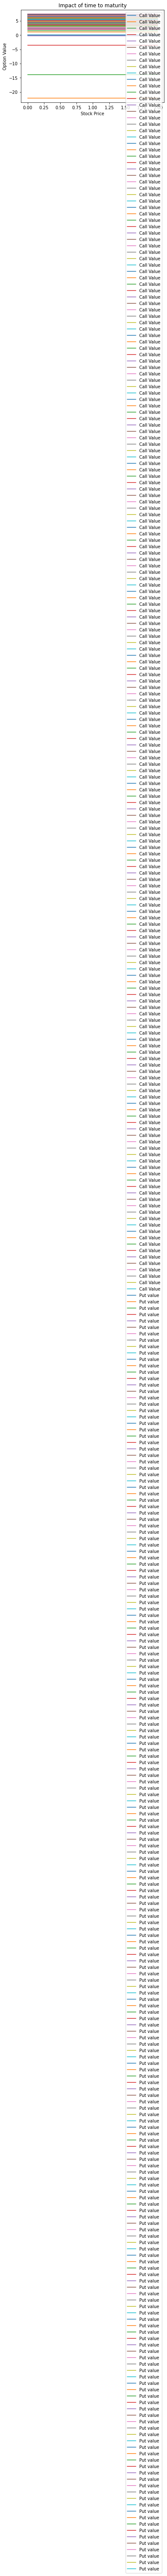

In [12]:
# Lecture 47, notes by Akhona Njeje.
# Date 5 Jan 2023.
# Application in Hedge Funds & Investments.



import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, t, r, sigma):
    d1 = (np.log(S/K) + ((r-q) + sigma**2/2)*T) / sigma * np.sqrt(T)  # Modelling.
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q*T)*N(d1) - K * np.exp(-r*T) * N(d2)



def BS_PUTS(S, K, t, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * N(-d2) - S * N(-d1)



import matplotlib.pyplot as plt
K = 100
r = 0.1   # RISK FREE rate.
S = 100   # S = Stock price.
sigma = 0.3
q = K

T = np.arange(0,2,0.01) # array & time to maturity.



calls = [BS_CALL(S, K, t, r, sigma) for t in T] # Array of series of options.
puts = [BS_PUTS(S, K, t, r, sigma) for t in T]

plt.plot(T, calls, label = 'Call Value')
plt.plot(T, puts, label = 'Put value')
plt.xlabel('Time to maturity')
plt.ylabel('Option Value')
plt.title('Impact of time to maturity')
plt.legend()

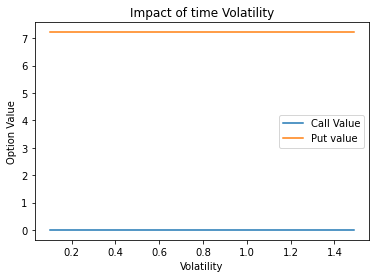

In [14]:
# Continuation of lecture 9 Jan 2023.
# Impact of Votality.

K = 100
r = 0.1   # RISK FREE rate.
S = 100   # S = Stock price.
T = 1



Sig = np.arange(0.1, 1.5, 0.01)



calls = [BS_CALL(S, K, T, r, sig) for sig in Sig] # Array of series of options.
puts = [BS_PUTS(S, K, T, r, sigma) for sig in Sig]

plt.plot(Sig, calls, label = 'Call Value')
plt.plot(Sig, puts, label = 'Put value')
plt.xlabel('Volatility')
plt.ylabel('Option Value')
plt.title('Impact of time Volatility')
plt.legend() # the Analysis is not spot on, why? Call Value & Put must go the diagonal direction.Not Horizontal direction.

In [18]:
# Lecture 48, notes by Akhona Njeje.
# Theory-Options Delta.
# Date 5 Jan 2023.
# Application in Hedge Funds & Investments.

# Call Opt = Exp(-qT)*N(d1)  &  Put Opt = Exp[N(d1) - 1].


K = 100
S = 100
r = 0.1
sigma = 0.3
def optDelta(q, T):
    d1 = ((np.log(S/K) + ((r - q) + sigma**2/2)*T)) / (sigma*np.sqrt(T))
    return np.exp(-q*T) * d1 * 100

In [19]:
optDelta(0.05, 1)

30.122265109189282

In [21]:
# P(S, t) = C(S, t) + K*Exp(-r*T) - S.
# Lets modell this formular with pycode.


import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL_PCP(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return (S * N(d1) - K * np.exp(-r*T) - S)

In [22]:
BS_CALL_PCP(100, 50, 10, 0.1, 0.5)

-18.393972058572118